In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv(r'C:\Users\HP\python_datasets\adult.csv',header=None, delimiter=' *, *') 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
             'occupation','relationship','race','sex','capital_gain','capital_loss',
             'hours_per_week','native_country','income']
df.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df['income'].value_counts() 

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [8]:
df.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [9]:
adult_df_rev = pd.DataFrame.copy(df) 

In [10]:
#dropping the variables 'fnlwgt' and 'education'
adult_df_rev = adult_df_rev.drop(['fnlwgt','education'],axis=1)
adult_df_rev.head() 

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
#rplacing '?' with NaN
adult_df_rev = adult_df_rev.replace(['?'], np.nan) 

In [12]:
adult_df_rev.isnull().sum() 

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [13]:
adult_df_rev.workclass.mode()[0] 

'Private'

In [14]:
#dropping the entire row which has NaN values in 'workclass','occupation' and 'native_country'
adult_df_rev = adult_df_rev.dropna(how='all', subset=['workclass','occupation','native_country'])

In [15]:
adult_df_rev.isnull().sum() 

age                  0
workclass         1809
education_num        0
marital_status       0
occupation        1816
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     556
income               0
dtype: int64

In [16]:
#filling the missing values with mode 
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0], inplace=True) 

In [17]:
adult_df_rev.isnull().sum() 

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [18]:
adult_df_rev['workclass'].value_counts() 

Private             24505
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
#creating a list of categorical columns
colname = []
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])

In [21]:
adult_df_rev.head() 

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [22]:
X = adult_df_rev[['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country']]
y = adult_df_rev['income'] 

In [23]:
#scaling the dependent columns 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X) 

[[ 0.03065129  2.62314652  1.13491918 ... -0.21660183 -0.03594151
   0.26148583]
 [ 0.83721757  1.72032035  1.13491918 ... -0.21660183 -2.22310273
   0.26148583]
 [-0.04267291 -0.08533197 -0.42008021 ... -0.21660183 -0.03594151
   0.26148583]
 ...
 [ 1.42381122 -0.08533197 -0.42008021 ... -0.21660183 -0.03594151
   0.26148583]
 [-1.21586022 -0.08533197 -0.42008021 ... -0.21660183 -1.65606093
   0.26148583]
 [ 0.98386598  0.81749419 -0.42008021 ... -0.21660183 -0.03594151
   0.26148583]]


In [24]:
y = y.astype(int) 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = classifier.predict(X_test) 

In [30]:
print(classifier.coef_)
print(classifier.intercept_) 

[[ 0.45042406 -0.08991682  0.86258914 -0.35723581 -0.04198948 -0.22200868
   0.10264254  0.44955172  2.30141596  0.26692496  0.38550753  0.01354591]]
[-1.52626457]


In [31]:
print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel()))) 

[('age', 0.4504240593577736), ('workclass', -0.08991682399177611), ('education_num', 0.8625891426372347), ('marital_status', -0.357235813794785), ('occupation', -0.04198948098292621), ('relationship', -0.22200867989904952), ('race', 0.1026425380112563), ('sex', 0.44955171811370453), ('capital_gain', 2.3014159601049857), ('capital_loss', 0.2669249592979997), ('hours_per_week', 0.3855075255003987), ('native_country', 0.013545905919879645)]


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 

[[6966  427]
 [1293 1075]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7393
           1       0.72      0.45      0.56      2368

    accuracy                           0.82      9761
   macro avg       0.78      0.70      0.72      9761
weighted avg       0.81      0.82      0.81      9761



# Adjusting the threshold

In [33]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.68166785 0.31833215]
 [0.37305392 0.62694608]
 [0.9827749  0.0172251 ]
 ...
 [0.38038372 0.61961628]
 [0.91706948 0.08293052]
 [0.61228766 0.38771234]]


In [34]:
y_pred_class = [] 
for value in y_pred_prob[:,1]:
    if value > 0.42:
        y_pred_class.append(1) 
    else:
        y_pred_class.append(0) 
print(y_pred_class) 

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_class)) 
print(classification_report(y_test, y_pred_class)) 
cfm = confusion_matrix(y_test, y_pred_class) 
print(cfm) 
acc = accuracy_score(y_test, y_pred_class) 
print("Accuracy of the model: ",acc)  

[[6739  654]
 [1077 1291]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7393
           1       0.66      0.55      0.60      2368

    accuracy                           0.82      9761
   macro avg       0.76      0.73      0.74      9761
weighted avg       0.81      0.82      0.82      9761

[[6739  654]
 [1077 1291]]
Accuracy of the model:  0.8226616125396988


In [36]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a,1,0) 
    cfm = confusion_matrix(y_test, predict_mine) 
    total_err = cfm[0,1] + cfm[1,0] 
    print("Errors at threshold ",a, ":",total_err, "type 2 error :",cfm[1,0], "type 1 error: ",cfm[0,1]) 

Errors at threshold  0.4 : 1739 type 2 error : 1020 type 1 error:  719
Errors at threshold  0.41000000000000003 : 1733 type 2 error : 1050 type 1 error:  683
Errors at threshold  0.42000000000000004 : 1731 type 2 error : 1077 type 1 error:  654
Errors at threshold  0.43000000000000005 : 1732 type 2 error : 1109 type 1 error:  623
Errors at threshold  0.44000000000000006 : 1717 type 2 error : 1128 type 1 error:  589
Errors at threshold  0.45000000000000007 : 1711 type 2 error : 1152 type 1 error:  559
Errors at threshold  0.4600000000000001 : 1711 type 2 error : 1178 type 1 error:  533
Errors at threshold  0.4700000000000001 : 1708 type 2 error : 1203 type 1 error:  505
Errors at threshold  0.4800000000000001 : 1709 type 2 error : 1229 type 1 error:  480
Errors at threshold  0.4900000000000001 : 1709 type 2 error : 1258 type 1 error:  451
Errors at threshold  0.5000000000000001 : 1720 type 2 error : 1293 type 1 error:  427
Errors at threshold  0.5100000000000001 : 1723 type 2 error : 13

# ROC and AUC

In [37]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1]) 
auc = metrics.auc(fpr,tpr) 
print(auc) 

0.8493450250602286


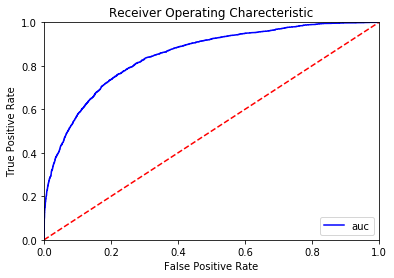

In [38]:
plt.title('Receiver Operating Charecteristic') 
plt.plot(fpr, tpr, 'b', label='auc') 
plt.legend(loc = 'lower right') 
plt.plot([0,1],[0,1], 'r--') 
plt.xlim([0,1]) 
plt.ylim([0,1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 

plt.show() 

In [39]:
#y_pred_class is the list of predicted values on the basis of 0.47 threshold
fpr,tpr,z = metrics.roc_curve(y_test, y_pred_class) 
auc = metrics.auc(fpr,tpr) 
print(auc) 
print(fpr) 
print(tpr) 

0.7283618760533157
[0.         0.08846206 1.        ]
[0.         0.54518581 1.        ]


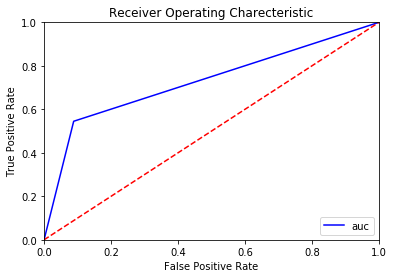

In [40]:
plt.title('Receiver Operating Charecteristic') 
plt.plot(fpr, tpr, 'b', label='auc') 
plt.legend(loc = 'lower right') 
plt.plot([0,1],[0,1], 'r--') 
plt.xlim([0,1]) 
plt.ylim([0,1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 

plt.show() 

# Running model using cross validation

In [41]:
#using cross validation
classifier = LogisticRegression() 

#performing K-fold cross validation
from sklearn.model_selection import KFold
kfold_cv = KFold(n_splits=10, random_state=10) 
print(kfold_cv) 

from sklearn.model_selection import cross_val_score
#running the model usin scoring metric as the accuracy
kfold_cv_result = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=kfold_cv) 

KFold(n_splits=10, random_state=10, shuffle=False)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [42]:
print(kfold_cv_result) 
print(kfold_cv_result.mean()) 

[0.82748025 0.82748025 0.81606673 0.83750549 0.8115942  0.82784365
 0.82301274 0.82389108 0.83179622 0.84101888]
0.8267689491780036


# Recursive Feature Elimination

In [43]:
import warnings
warnings.filterwarnings('ignore') 

In [44]:
colname = adult_df_rev.columns

In [45]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, 8) 
model_rfe = rfe.fit(X_train, y_train) 
print('Number of features: ',model_rfe.n_features_) 
print(list(zip(colname, model_rfe.support_))) 
print('Feature Raking: ',model_rfe.ranking_) 

Number of features:  8
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Raking:  [1 3 1 1 4 1 2 1 1 1 1 5]


In [46]:
Y_pred = model_rfe.predict(X_test) 

In [47]:
print(confusion_matrix(y_test, Y_pred)) 
print(classification_report(y_test, Y_pred)) 
cfm = confusion_matrix(y_test, Y_pred) 
print(cfm) 
acc = accuracy_score(y_test, Y_pred) 
print("Accuracy of the model: ",acc)  

[[6971  422]
 [1285 1083]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7393
           1       0.72      0.46      0.56      2368

    accuracy                           0.83      9761
   macro avg       0.78      0.70      0.73      9761
weighted avg       0.81      0.83      0.81      9761

[[6971  422]
 [1285 1083]]
Accuracy of the model:  0.8251203770105522


# SGD Classifier

In [55]:
#loss="log" specifies that we want to perform logistic regression using the sgdclassifier
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss="log", random_state=10) 
classifier.fit(X_train, y_train) 
Y_pred = classifier.predict(X_test) 
#print(list(zip(y_test, Y_pred))) 
print(list(zip(adult_df_rev.columns[:-1], classifier.coef_.ravel()))) 

[('age', 0.4925628453083695), ('workclass', -0.05470281123297409), ('education_num', 0.7322776132381992), ('marital_status', -0.4325501610914558), ('occupation', -0.023626233155587446), ('relationship', -0.22194833174423306), ('race', 0.2734803058111648), ('sex', 0.521630683624131), ('capital_gain', 2.356887383519227), ('capital_loss', 0.4575276765746965), ('hours_per_week', 0.4471868072319452), ('native_country', 0.06572615481741056)]


In [56]:
print(confusion_matrix(y_test, Y_pred)) 
print(classification_report(y_test, Y_pred)) 
cfm = confusion_matrix(y_test, Y_pred) 
print(cfm) 
acc = accuracy_score(y_test, Y_pred) 
print("Accuracy of the model: ",acc)  

[[6892  501]
 [1257 1111]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7393
           1       0.69      0.47      0.56      2368

    accuracy                           0.82      9761
   macro avg       0.77      0.70      0.72      9761
weighted avg       0.81      0.82      0.81      9761

[[6892  501]
 [1257 1111]]
Accuracy of the model:  0.8198955025099888


# Variance Threshold

In [59]:
X = adult_df_rev.values[:, :-1] 
Y = adult_df_rev.values[:,-1] 

In [60]:
#variance threshold detects the variables that has less variance
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(2) 
fit1 = vt.fit(X, Y) 

features = fit.transform(X) 
print(features) 
print(features.shape[1]) 
print(list(zip(colname, fit1.get_support()))) 

NameError: name 'fit' is not defined